## Sesión 04 - Laboratorio de Suministros

Primero importamos las librerías necesarias para el Análisis de Datos Exploratorio (EDA). Las versiones de estas librerías se encuentran en el archivo requirements.txt que se recomiendo instalar con pip

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

Abrimos el archivo en un dataframe como .parquet porque conserva el tipo de dato a diferencia de .csv que convierte todo a string.

In [2]:
df_suministro = pd.read_parquet("suministros.parquet")

La notebook permite visualizar tanto la cabecera como la cola del dataframe como se observa a continuación

In [3]:
df_suministro

,DEPARTAMENTO,NRO_SERVICIO,TIPO_TARIFARIO,CONEXION,COORDENADA_X,COORDENADA_Y,consumo_201001,consumo_201002,consumo_201003,consumo_201004,...,consumo_202110,consumo_202111,consumo_202112,consumo_202201,consumo_202202,consumo_202203,consumo_202204,consumo_202205,consumo_202206,consumo_202207
0,La Libertad,63435012.0,BT5BR,MONOFÁSICO,-78.976071,-8.062080,NaN,NaN,NaN,NaN,...,14.0,14.0,14.0,16.0,14.0,15.0,14.0,15.0,15.0,14.0
1,La Libertad,63448244.0,BT5BR,MONOFÁSICO,-79.004644,-8.065706,NaN,NaN,NaN,NaN,...,8.0,7.0,10.0,7.0,6.0,8.0,9.0,10.0,13.0,13.0
2,La Libertad,66916519.0,BT5B,TRIFÁSICO,-79.060620,-8.043771,NaN,NaN,NaN,NaN,...,75.0,58.0,50.0,93.0,213.0,90.0,172.0,102.0,1.0,46.0
3,La Libertad,63190967.0,BT5BR,MONOFÁSICO,-79.069450,-8.020960,NaN,NaN,NaN,NaN,...,21.0,21.0,27.0,26.0,29.0,39.0,39.0,37.0,28.0,NaN
4,La Libertad,63195749.0,BT5BR,MONOFÁSICO,-78.975008,-8.062605,NaN,NaN,NaN,NaN,...,4.0,3.0,3.0,4.0,3.0,NaN,1.0,2.0,27.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63731,La Libertad,66890557.0,BT5BR,MONOFÁSICO,-79.007886,-8.072484,NaN,NaN,NaN,NaN,...,165.0,129.0,127.0,108.0,65.0,103.0,67.0,126.0,120.0,139.0
63732,La Libertad,64601931.0,BT5BR,MONOFÁSICO,-79.005980,-8.063865,NaN,NaN,NaN,NaN,...,40.0,13.0,9.0,8.0,41.0,NaN,NaN,NaN,NaN,NaN
63733,La Libertad,64625808.0,BT5BR,MONOFÁSICO,-78.997961,-8.081444,NaN,NaN,NaN,NaN,...,37.0,44.0,34.0,47.0,39.0,80.0,42.0,45.0,39.0,30.0
63734,La Libertad,64667281.0,BT5BR,MONOFÁSICO,-78.977805,-8.063977,NaN,NaN,NaN,NaN,...,74.0,84.0,88.0,95.0,86.0,91.0,82.0,74.0,58.0,61.0


In [19]:
df_suministro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63736 entries, 0 to 63735
Columns: 157 entries, DEPARTAMENTO to consumo_202207
dtypes: float64(154), object(3)
memory usage: 76.3+ MB


Existe un total de 157 columnas donde 154 tienen valores decimales y 3 son cadenas de caracteres, con más de 63 mil filas y el dataframe fue cargado usando 76.3 MB

In [ ]:
#df_suministro.to_csv("suministros.csv", sep=';', index=False)  # código para transformar a CSV

Revisamos los nombres de las columnas accediendo a la propiedad de la clase DataFrame para tener mayor entendimiento de la data puesto que no se cuenta con un archivo de metadatos

In [4]:
print(df_suministro.columns)

Index(['DEPARTAMENTO', 'NRO_SERVICIO', 'TIPO_TARIFARIO', 'CONEXION',
       'COORDENADA_X', 'COORDENADA_Y', 'consumo_201001', 'consumo_201002',
       'consumo_201003', 'consumo_201004',
       ...
       'consumo_202110', 'consumo_202111', 'consumo_202112', 'consumo_202201',
       'consumo_202202', 'consumo_202203', 'consumo_202204', 'consumo_202205',
       'consumo_202206', 'consumo_202207'],
      dtype='object', length=157)


Revisamos la cantidad de valores nulos

In [5]:
df_suministro.isnull().sum()

DEPARTAMENTO         0
NRO_SERVICIO         0
TIPO_TARIFARIO       0
CONEXION             0
COORDENADA_X       503
                  ... 
consumo_202203    6391
consumo_202204    6315
consumo_202205    6219
consumo_202206    6255
consumo_202207    6269
Length: 157, dtype: int64

Como se logra observar la columna COORDENADA_X y muchas de las columnas de los periodos de consumo tienen valores faltantes, alrededor de 6 mil en el caso de los periodos de consumo. Seguidamente, calcularemos el porcentaje de valores faltante por columna para decidir su tratamiento posterior 

In [6]:
# Seleccionar solo las columnas de consumo
columnas_consumo = [col for col in df_suministro.columns if col.startswith("consumo_")]
df_consumo = df_suministro[columnas_consumo].copy()

In [7]:
nulos_porcentaje = df_consumo.isnull().mean() * 100
print(nulos_porcentaje.sort_values(ascending=False))

consumo_201001    45.131480
consumo_201002    45.074997
consumo_201003    45.048324
consumo_201004    45.046755
consumo_201005    44.552529
                    ...    
consumo_202203    10.027300
consumo_202204     9.908058
consumo_202207     9.835886
consumo_202206     9.813920
consumo_202205     9.757437
Length: 151, dtype: float64


A continuación, realizamos de detección de outliers con diferentes técnicas, removiendo los valores nulos como paso previo

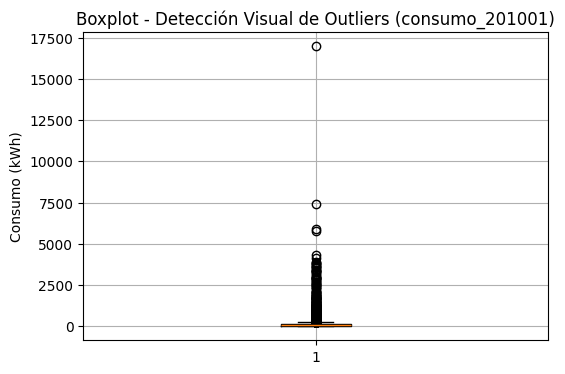

In [23]:
########Grafica de Boxplot

# Paso 1: Extraer la variable y eliminar nulos
df = df_suministro[['consumo_201001']].dropna()
df = df.rename(columns={'consumo_201001': 'valor'})  # renombrar para mantener consistencia

# Paso 2: Visualización inicial
plt.figure(figsize=(6, 4))
plt.boxplot(df['valor'])
plt.title("Boxplot - Detección Visual de Outliers (consumo_201001)")
plt.ylabel("Consumo (kWh)")
plt.grid(True)
plt.show()


Visualmente, detectamos la presencia de valores extremos, es decir, de outliers o valores atípicos como un registro de casi 17,500 kWh mientras que la mayoría de de puntos se ubican en la pate inferior. A simple vista, la mayor parte de los valores se encuentran concentrados en valores bastante bajos, es decir consumos bajos. POr lo tanto, la distribución está sesgada a la derecha (asimetría positiva)

In [22]:
df_suministro.describe()

,NRO_SERVICIO,COORDENADA_X,COORDENADA_Y,consumo_201001,consumo_201002,consumo_201003,consumo_201004,consumo_201005,consumo_201006,consumo_201007,...,consumo_202110,consumo_202111,consumo_202112,consumo_202201,consumo_202202,consumo_202203,consumo_202204,consumo_202205,consumo_202206,consumo_202207
count,6.373600e+04,63233.000000,63233.000000,34971.000000,35007.000000,35024.000000,35025.000000,35340.000000,35604.000000,35685.000000,...,56156.000000,56130.000000,56222.000000,56746.000000,57004.000000,57345.000000,57421.000000,57517.000000,57481.000000,57467.000000
mean,5.425289e+07,-78.590661,-8.620453,99.394954,90.579493,99.657315,95.949470,97.094975,94.251679,96.308587,...,95.955911,94.893569,99.632059,99.278985,90.673893,101.729789,96.553521,97.564216,95.145724,98.231960
std,6.675800e+06,0.614343,0.600574,191.162759,186.697017,191.819975,185.360823,193.847753,182.721857,187.860764,...,216.730336,221.721811,232.442862,224.433646,209.178528,236.871017,222.256714,229.730623,226.390643,228.362134
min,4.600003e+07,-79.122329,-10.267293,0.030000,0.050000,0.100000,0.100000,0.030000,0.100000,0.300000,...,0.100000,0.500000,0.700000,0.600000,0.100000,0.100000,0.270000,0.100000,0.300000,0.100000
25%,4.770244e+07,-79.006990,-9.120604,27.000000,24.000000,27.000000,28.000000,29.000000,28.000000,29.000000,...,25.000000,24.000000,25.000000,25.000000,22.000000,25.000000,24.000000,24.000000,24.000000,25.000000
50%,5.180459e+07,-78.978499,-8.086568,63.000000,57.000000,63.000000,61.000000,61.000000,59.000000,60.000000,...,58.000000,58.000000,61.000000,62.000000,56.000000,63.000000,59.000000,58.000000,56.000000,58.000000
75%,6.037383e+07,-78.511002,-8.065643,121.000000,109.950000,120.000000,114.000000,112.000000,108.000000,109.000000,...,105.000000,104.000000,110.000000,111.000000,101.000000,112.000000,106.000000,106.000000,103.000000,106.000000
max,6.913051e+07,-76.987063,-7.993581,16983.600000,15876.600000,15815.200000,15169.600000,16236.700000,14344.600000,13525.400000,...,8067.000000,13498.000000,14890.000000,10063.000000,9560.000000,10979.000000,9451.000000,9590.000000,9306.000000,8159.000000


In [9]:
##################################### Métodos de Detección Outlier ####################

In [ ]:
#######   Método IQR #########

# Paso 1: Seleccionar y preparar la variable
df = df_consumo[['consumo_201001']].dropna().rename(columns={'consumo_201001': 'valor'})

# Paso 2: Calcular columnas adicionales
df['z_score'] = zscore(df['valor'])
df['valor_shifted'] = df['valor'] - df['valor'].min()
df['diff'] = df['valor'] - df['valor'].median()
mad = np.mean(np.abs(df['diff']))  # cálculo manual de MAD
df['mad_score'] = df['diff'] / mad

# Paso 3: Aplicar método IQR
Q1 = df['valor'].quantile(0.25)
Q3 = df['valor'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Paso 4: Filtrar los outliers
outliers_iqr = df[(df['valor'] < limite_inferior) | (df['valor'] > limite_superior)]

# Paso 5: Mostrar resumen con todas las métricas
outliers_iqr.describe()



,valor,z_score,valor_shifted,diff,mad_score
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000
mean,519.485683,2.197587,519.455683,456.485683,6.466478
std,621.386612,3.250610,621.386612,621.386612,8.802429
min,263.000000,0.855854,262.970000,200.000000,2.833157
25%,302.000000,1.059871,301.970000,239.000000,3.385622
50%,367.000000,1.399901,366.970000,304.000000,4.306398
75%,514.000000,2.168890,513.970000,451.000000,6.388769
max,16983.600000,88.324978,16983.570000,16920.600000,239.693568


Tanto z-score (cuantas desviaciones se aleja cada punto de la media) con valores como 88 superiores a 3 y mad-score (cuantas desviaciones se aleja cada punto de la mediana) como 239 extremadamente superior a 3.5 verifican la presencia de outliers a nivel de números. Se procederá a contar la cantidad de valores atípicos

In [ ]:
############## Método Z-Score (estandarización)

# --- Paso 1: Preparar el DataFrame (ajusta la columna si es necesario) ---
# --- Paso 2: Calcular Z-Score ---
df['z_score'] = zscore(df['valor'])

# --- Paso 3: Calcular otras columnas útiles ---
df['valor_shifted'] = df['valor'] - df['valor'].min()
df['diff'] = df['valor'] - df['valor'].median()
mad = np.mean(np.abs(df['diff']))
df['mad_score'] = df['diff'] / mad

# --- Paso 4: Detectar outliers con Z-Score (abs > 3) ---
outliers_z = df[df['z_score'].abs() > 3]

# --- Paso 5: Mostrar resumen de los outliers ---
print("Resumen de outliers detectados por Z-Score:")
print(outliers_z.describe())

Resumen de outliers detectados por Z-Score:
              valor     z_score  valor_shifted          diff   mad_score
count    285.000000  285.000000     285.000000    285.000000  285.000000
mean    1396.966807    6.787883    1396.936807   1333.966807   18.896686
std     1339.669596    7.008105    1339.669596   1339.669596   18.977470
min      674.000000    3.005885     673.970000    611.000000    8.655294
25%      775.000000    3.534238     774.970000    712.000000   10.086038
50%      956.000000    4.481089     955.970000    893.000000   12.650045
75%     1451.000000    7.070542    1450.970000   1388.000000   19.662108
max    16983.600000   88.324978   16983.570000  16920.600000  239.693568


De esta tabla de valores detectados con Z-score, se observa que hay un total de 285 valores atípicos van desde 674 kWh hasta 16,983.6 kWh. Esto quiere decir que hay un segmento que consume electricidad muy por encima por el promedio.

In [15]:
########################Método MAD (Desviación Absoluta Mediana)

# Paso 1: Preparar el DataFrame
# Paso 2: Calcular columnas auxiliares
df['z_score'] = zscore(df['valor'])  # z-score
df['valor_shifted'] = df['valor'] - df['valor'].min()  # valor ajustado
df['diff'] = df['valor'] - df['valor'].median()  # diferencia con mediana
mad = np.median(np.abs(df['valor'] - df['valor'].median()))  # MAD robusto
# print(mad)
df['mad_score'] = 0.6745 * (df['valor'] - df['valor'].median()) / mad  # z-score robusto

# Paso 3: Filtrar outliers por MAD (> 3.5)
outliers_mad = df[np.abs(df['mad_score']) > 3.5]

# Paso 4: Mostrar tabla resumen como en la imagen
print(outliers_mad[['valor', 'z_score', 'valor_shifted', 'diff', 'mad_score']].describe())


              valor      z_score  valor_shifted          diff    mad_score
count   1834.000000  1834.000000    1834.000000   1834.000000  1834.000000
mean     546.202208     2.337347     546.172208    483.202208     7.949266
std      647.893375     3.389272     647.893375    647.893375    10.658636
min      276.000000     0.923860     275.970000    213.000000     3.504110
25%      315.000000     1.127877     314.970000    252.000000     4.145707
50%      384.000000     1.488831     383.970000    321.000000     5.280841
75%      541.500000     2.312748     541.470000    478.500000     7.871909
max    16983.600000    88.324978   16983.570000  16920.600000   278.364505


Con el método Median Absolute Deviation (MAD) se detectaron más valores atípicos que con z score porque este método es más sensible a distribuciones sesgadas o con valores tan extremos

In [16]:
########### Método Percentiles extremos

# --- Paso 1: Preparar el DataFrame ---
# --- Paso 2: Calcular columnas auxiliares ---
df['z_score'] = zscore(df['valor'])  # estandarización
df['valor_shifted'] = df['valor'] - df['valor'].min()  # valor trasladado
df['diff'] = df['valor'] - df['valor'].median()  # diferencia con la mediana

# --- Paso 3: Calcular límites de percentil 1% y 99% ---
limite_inf = df['valor'].quantile(0.01)
limite_sup = df['valor'].quantile(0.99)

# --- Paso 4: Filtrar outliers por percentiles ---
outliers_pct = df[(df['valor'] < limite_inf) | (df['valor'] > limite_sup)]

# --- Paso 5: Mostrar resumen ---
print("Outliers detectados con percentiles (1% y 99%):")
print(outliers_pct[['valor', 'z_score', 'valor_shifted', 'diff']].describe())


Outliers detectados con percentiles (1% y 99%):
              valor     z_score  valor_shifted          diff
count    408.000000  408.000000     408.000000    408.000000
mean    1076.798235    5.113011    1076.768235   1013.798235
std     1233.555538    6.452999    1233.555538   1233.555538
min        0.030000   -0.519800       0.000000    -62.970000
25%      654.750000    2.905184     654.720000    591.750000
50%      793.000000    3.628400     792.970000    730.000000
75%     1104.500000    5.257925    1104.470000   1041.500000
max    16983.600000   88.324978   16983.570000  16920.600000


COn el enfoque basado en percentiles extremos, se detectaron 408 outliers con valores extremadamente bajos como 0.03 kWh que pueden ser medidores nuevos o recién instalados y consumidores gigantes como el de 16 mil kWh que seguramente 

In [ ]:
############### Método por diferencias sucesivas (series temporales)

# --- Paso 1: Preparar el DataFrame ---
# --- Paso 2: Calcular z_score y columnas auxiliares ---
df['z_score'] = zscore(df['valor'])
df['valor_shifted'] = df['valor'].shift(1)  # desplazamiento temporal
df['diff'] = (df['valor'] - df['valor_shifted']).abs()  # diferencia absoluta entre valores consecutivos

# --- Paso 3: Definir umbral como media + 3 * desviación estándar de la diferencia ---
umbral = df['diff'].mean() + 3 * df['diff'].std()

# --- Paso 4: Filtrar outliers por salto abrupto ---
outliers_diff = df[df['diff'] > umbral]

# --- Paso 5: Mostrar resumen de outliers detectados por diferencia temporal ---
print("Outliers detectados por saltos abruptos (diferencia temporal):")
print(outliers_diff[['valor', 'z_score', 'valor_shifted', 'diff']].describe())


In [ ]:
################################# Visualización con Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Limpieza de nombres de columnas para evitar errores
df_suministro.columns = df_suministro.columns.str.strip().str.lower()

# Copia con columnas relevantes
df_plot = df_suministro[['consumo_201001', 'consumo_201002', 'departamento']].dropna()

# Gráfico de dispersión
sns.scatterplot(data=df_plot, x='consumo_201001', y='consumo_201002', hue='departamento')
plt.title("Dispersión de consumo enero vs febrero por departamento")
plt.xlabel("Consumo enero")
plt.ylabel("Consumo febrero")
plt.grid(True)
plt.show()

# Boxplot de consumo enero por departamento
sns.boxplot(data=df_plot, x='departamento', y='consumo_201001')
plt.title("Distribución de consumo enero por departamento")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [ ]:
###########################  Detección multivariable con distancia de Mahalanobis

In [ ]:
from scipy.spatial import distance
from scipy.stats import chi2

In [ ]:
# Selección de variables para análisis multivariado
X = df_suministro[['consumo_201001', 'consumo_201002']].dropna()

# Calcular media y matriz de covarianza
mean_vec = X.mean().values
cov_matrix = np.cov(X.values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Función para calcular distancia de Mahalanobis
def mahalanobis_distance(row, mean, inv_cov):
    return distance.mahalanobis(row, mean, inv_cov)

# Calcular la distancia para cada fila
X['mahal_dist'] = X.apply(lambda row: mahalanobis_distance(row, mean_vec, inv_cov_matrix), axis=1)

# Umbral chi-cuadrado con 2 grados de libertad (por 2 variables)
umbral = np.sqrt(chi2.ppf(0.975, df=2))  # ≈ 2.4477

# Clasificación de outliers
X['outlier_mahal'] = X['mahal_dist'] > umbral

# Visualización
sns.scatterplot(data=X, x='consumo_201001', y='consumo_201002', hue='outlier_mahal', palette={True: 'red', False: 'blue'})
plt.title("Outliers multivariables con distancia de Mahalanobis")
plt.xlabel("Consumo enero")
plt.ylabel("Consumo febrero")
plt.grid(True)
plt.show()


In [ ]:
############################## Metodos para Imputar valores Faltantes

In [ ]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = df_suministro = pd.read_parquet("suministros.parquet")

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
# Ver nombres exactos de columnas luego de pasar a minúsculas
print(df.columns.tolist())

In [ ]:
# Seleccionar columnas y renombrar
df_plot = df[['nro_servicio', 'consumo_201001']].copy()
df_plot = df_plot.rename(columns={'nro_servicio': 'fecha', 'consumo_201001': 'valor'})

# Gráfico de valores con posibles faltantes
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_plot, x='fecha', y='valor', marker='o')
plt.title("Valores con Datos Faltantes - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Imputación con la media (promedio)
df_media = df[['nro_servicio', 'consumo_201001']].copy()
# Crear copia de df_plot para imputación con la media
df_media = df_plot.copy()

# Calcular la media sin contar los valores NaN
media = df_media['valor'].mean()

# Reemplazar los NaN con la media
df_media['valor'] = df_media['valor'].fillna(media)


In [ ]:
# Gráfico de la serie imputada con la media
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_media, x='fecha', y='valor', marker='o')
plt.title("Valores con Datos Faltantes - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (imputado)")
plt.tight_layout()
plt.show()

In [ ]:
# 3. Imputación con la media +/- desviación estándar (valor aleatorio)
df_std = df_plot.copy()

# Calcular media y desviación estándar de los valores no nulos
mean = df_std['valor'].mean()
std = df_std['valor'].std()

# Aplicar imputación aleatoria dentro del rango [mean - std, mean + std]
df_std['valor'] = df_std['valor'].apply(
    lambda x: x if not pd.isna(x) else np.random.uniform(mean - std, mean + std)
)

In [ ]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_std, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con media ± desviación estándar - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (imputado aleatoriamente)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Imputación personalizada: promedio entre anterior y posterior
df_interp = df_plot.copy()

# Aplicar imputación fila por fila
for i in range(len(df_interp)):
    if pd.isna(df_interp.iloc[i]['valor']):
        prev_val = df_interp.iloc[i - 1]['valor'] if i > 0 else np.nan
        next_val = df_interp.iloc[i + 1]['valor'] if i < len(df_interp) - 1 else np.nan

        if not np.isnan(prev_val) and not np.isnan(next_val):
            df_interp.at[i, 'valor'] = (prev_val + next_val) / 2
        else:
            df_interp.at[i, 'valor'] = 0  # Si uno de los dos no existe o es NaN


In [ ]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_interp, x='fecha', y='valor', marker='o')
plt.title("Valores imputados por promedio entre anterior y posterior - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (interpolado manual)")
plt.tight_layout()
plt.show()


In [ ]:
# 5. Imputación con Promedios Móviles (ventana de 6 posiciones)
df_movavg = df_plot.copy()

# Aplicar imputación con promedio móvil (rolling mean)
df_movavg['valor'] = df_movavg['valor'].fillna(
    df_movavg['valor'].rolling(window=6, min_periods=1).mean()
)

In [ ]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_movavg, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con promedio móvil (ventana = 6) - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (rolling mean)")
plt.tight_layout()
plt.show()

In [ ]:
# 6. Imputación con técnicas de propagación
df_ffill = df_plot.copy()
df_ffill['valor'] = df_ffill['valor'].fillna(method='ffill')  # Hacia adelante

df_bfill = df_plot.copy()
df_bfill['valor'] = df_bfill['valor'].fillna(method='bfill')  # Hacia atrás

In [ ]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_bfill, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con propagación hacia atrás (bfill) - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (bfill)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# 7. Imputación con un valor constante (por ejemplo, 0)
df_const = df_plot.copy()
df_const['valor'] = df_const['valor'].fillna(0)

In [ ]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_const, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con valor constante (0) - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (constante)")
plt.tight_layout()
plt.show()


In [ ]:
# Comparación visual de los métodos
# Crear figura con subplots 4x2 (8 espacios, usaremos 7)
fig, axes = plt.subplots(4, 2, figsize=(18, 16), sharex=True)

# Lista de imputaciones y sus nombres
methods = [df_media, df_std, df_interp, df_movavg, df_ffill, df_bfill, df_const]
titles = ['Media', 'Media ± STD', 'Interpolación', 'Prom. Móvil', 'Forward Fill', 'Backward Fill', 'Valor Constante']

# Graficar cada método junto a la serie original
for ax, df_met, title in zip(axes.flat, methods, titles):
    sns.lineplot(data=df_plot, x='fecha', y='valor', label='Original', ax=ax, marker='o')
    sns.lineplot(data=df_met, x='fecha', y='valor', label=title, ax=ax)
    ax.set_title(f"Imputación: {title}")
    ax.legend()

plt.tight_layout()
plt.show()



In [ ]:
################################################# Normalización de Datos #################################

In [ ]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= df_plot.copy()

In [ ]:
df.describe()

In [ ]:
# 2. Normalización Min-Max: escala cada valor entre 0 y 1
df_minmax = df.copy()
for col in df_minmax.columns:
    min_val = df_minmax[col].min()
    max_val = df_minmax[col].max()
    df_minmax[col] = (df_minmax[col] - min_val) / (max_val - min_val)

In [ ]:
df_minmax.describe()

In [ ]:
# 3. Z-Score
df_zscore = df.copy()
for col in df_zscore.columns:
    mean = df_zscore[col].mean()
    std = df_zscore[col].std()
    df_zscore[col] = (df_zscore[col] - mean) / std

In [ ]:
df_zscore.describe()

In [ ]:
# 4. Escalamiento Six Sigma: media 0, rango de ±3σ → [0,1]
df_sixsigma = df.copy()
for col in df_sixsigma.columns:
    mean = df_sixsigma[col].mean()
    std = df_sixsigma[col].std()
    df_sixsigma[col] = (df_sixsigma[col] - mean + 3*std) / (6*std)

In [ ]:
df_sixsigma.describe()

In [ ]:
# 5. Escalado robusto con IQR (percentil 25-75)
df_robust = df.copy()
for col in df_robust.columns:
    q1 = df_robust[col].quantile(0.25)
    q3 = df_robust[col].quantile(0.75)
    iqr = q3 - q1
    df_robust[col] = (df_robust[col] - q1) / iqr

In [ ]:
df_robust.describe()

In [ ]:
# 6. Escalado logarítmico: útil para datos con alta dispersión positiva
df_log = df.copy()
for col in df_log.columns:
    min_val = df_log[col].min()
    df_log[col] = np.log1p(df_log[col] - min_val + 1)  # log(x - min + 1)

In [ ]:
df_log.describe()

In [ ]:
# 7. MaxAbs Scaling: divide por el valor absoluto máximo
df_maxabs = df.copy()
for col in df_maxabs.columns:
    max_abs = np.abs(df_maxabs[col]).max()
    df_maxabs[col] = df_maxabs[col] / max_abs

In [ ]:
df_maxabs.describe()

In [ ]:
# 8. Escalamiento Six Sigma basado en limites
df_sixsigma = df.copy()
df_clipped = df.copy()

# Escalamiento tipo Six Sigma y clipping
for col in df.columns:
    mean = df[col].mean()
    std = df[col].std()

    # Escalamiento normal al rango [0,1] usando el rango de 6σ
    df_sixsigma[col] = (df[col] - mean + 3 * std) / (6 * std)

    # Límite inferior y superior (3σ)
    lower_limit = mean - 3 * std
    upper_limit = mean + 3 * std

    # Clipping: sustituir valores fuera de ±3σ con los límites
    df_clipped[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

In [ ]:
# Comparar distribuciones originales vs normalizadas
fig, axes = plt.subplots(3, 8, figsize=(25, 10))
cols = df.columns

for i, col in enumerate(cols):
    sns.histplot(df[col], ax=axes[i][0], kde=True, color="#AEC6CF")
    axes[i][0].set_title(f"{col} - Original")
    
    sns.histplot(df_minmax[col], ax=axes[i][1], kde=True, color="#FFB347")
    axes[i][1].set_title(f"{col} - MinMax")
    
    sns.histplot(df_zscore[col], ax=axes[i][2], kde=True, color="#77DD77")
    axes[i][2].set_title(f"{col} - Z-Score")
    
    sns.histplot(df_sixsigma[col], ax=axes[i][3], kde=True, color="#FF6961")
    axes[i][3].set_title(f"{col} - sixsigma ")
    
    sns.histplot(df_robust[col], ax=axes[i][4], kde=True, color="#FDFD96")
    axes[i][4].set_title(f"{col} - IQR ")
    
    sns.histplot(df_log[col], ax=axes[i][5], kde=True, color="#CBAACB")
    axes[i][5].set_title(f"{col} - logarítmico ")
    
    sns.histplot(df_maxabs[col], ax=axes[i][6], kde=True, color="#B39EB5")
    axes[i][6].set_title(f"{col} - MaxAbs Scaling ")
    
    sns.histplot(df_maxabs[col], ax=axes[i][7], kde=True, color="#FF6961")
    axes[i][7].set_title(f"{col} - sixsigma limites ")


plt.tight_layout()
plt.show()

In [ ]:
#| Técnica       | Uso Principal                          | Sensible a outliers |
#| ------------- | -------------------------------------- | ------------------- |
#| Min-Max       | Escala uniforme \[0, 1]                |  Sí                |
#| Z-Score       | Estandarización clásica                |  Sí                |
#| Six Sigma     | Datos bajo control de calidad          |  Sí                |
#| IQR (Robusto) | Datos con outliers extremos            |  No                |
#| Logarítmico   | Datos sesgados a la derecha            |  Sí                |